In [1]:
%matplotlib inline
import os
import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from Model.model import Model
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.manifold import TSNE

# Plot loss

In [2]:
record_vae = np.load('./Save/record_vae.npy')

### VAE loss

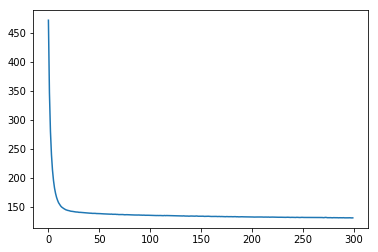

In [3]:
plt.plot(record_vae)

# Use test data to test model 


In [4]:
batch_size = 5000
z_dim = 2
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True) 
data = mnist.test.images[0:batch_size]
labels = mnist.test.labels[0:batch_size]
input_dim = np.shape(data)[1]

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
model = Model(input_dim, z_dim)
model.set_model()
saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess, "./Save/model.ckpt")
print("Model restored")

Model restored


In [6]:
z = model.encoding(sess, data)
indexes = np.argmax(np.asarray(labels), axis = 1)
unique, counts = np.unique(indexes, return_counts=True)
print np.asarray((unique, counts)).T

[[  0 460]
 [  1 571]
 [  2 530]
 [  3 500]
 [  4 500]
 [  5 456]
 [  6 462]
 [  7 512]
 [  8 489]
 [  9 520]]


In [7]:
if z_dim > 2:
    tsne = TSNE(n_components = 2, random_state = 0)
    t_z = tsne.fit_transform(z)
else:
    t_z = z

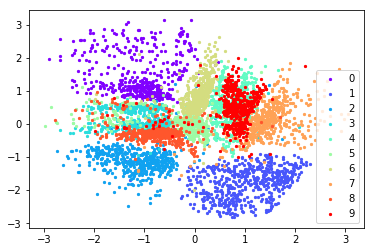

In [8]:
colors = cm.rainbow(np.linspace(0, 1, 10))
scatter = []
index = xrange(10)
for i in range(10):
    tmp = np.where(indexes == i)
    scatter.append(plt.scatter(t_z[tmp, 0], t_z[tmp, 1], c = colors[i] ,s = 5))

plt.legend(scatter, index)
plt.savefig('Result/VAE_mnist_test.png')
plt.show()


In [9]:
data = model.gen_data(sess, z)

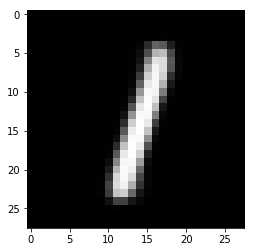

In [10]:
tmp = np.reshape(data[5], (28, 28))
plt.imshow(tmp, cmap='gray')

In [11]:
sess.close()